# 2. History of the Gaussian Distribution
If you have read any of my other posts, worked with statistics/probability, or any sort of machine learning, there is a very good chance that you have come across the **Gaussian Distribution**. The gaussian distribution, also known as the **Normal Distribution**, has an incredibly large range of uses; we will not talk about them here, however. For that I recommend looking through my other notebooks, digging into the **Central Limit Theorem**, **sampling**, **Gaussian Mixture Models**, distributions in the social sciences, **hypothesis testing**, and so on. 

The purpose of this post is to uncover what bothered me while learning about so many of the above topics: 

> Where did the equation that represents the Gaussian Distribution come from?

For those who are a bit rusty with their recollection of the normal distribution, here are a few key points:
* It is a **continuous** probability distribution.
* It is often used to describe a **random variable** whose distribution is not known, but is thought to represent a gaussian data generating process
* It plays a large role in **statistical inference** based on its use in the central limit theorem.

Mathematically, the Gaussian Distribution is defined as follows:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

Where $\mu$ is the **mean**/**expectation** of the distribution, $\sigma$ is the **standard deviation**, and $\sigma^2$ is the **variance**. If you are rusty on your understanding of the prior term's definitions, I recommend reviewing my previous post. It is worth noting that the normal distribution is parameterized by $\mu$ and $\sigma^2$, and it can be stated verbally as:

> It is a curve representing the probability of observing a specific value of $x$ given $\mu$ and $\sigma^2$.

Visually, it looks like:

In [1]:
import numpy as np
from scipy.stats import bernoulli, binom, norm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style="white", palette="husl")
sns.set_context("talk")
sns.set_style("ticks")

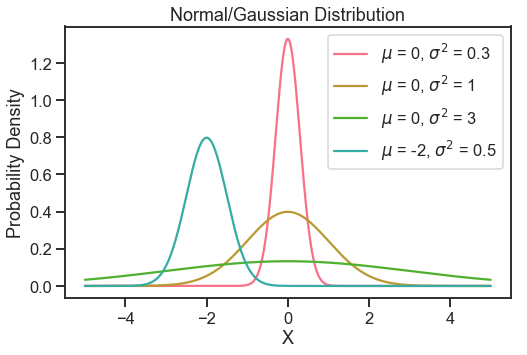

In [2]:
fig = plt.figure(figsize=(8,5))
means = [0, 0, 0, -2]
variances = [0.3, 1, 3, 0.5]
x_axis = np.arange(-5, 5, 0.001)
legend = []
for mu, var in zip(means, variances):
    plt.plot(x_axis, norm.pdf(x_axis,mu,var))
    legend.append(f'$\mu$ = {mu}, $\sigma^2$ = {var}')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normal/Gaussian Distribution')
plt.legend(legend)
plt.show()

Now, the question remains: where on earth did this come from? Upon examination is is clearly a rather complex equation, with an exponential, $\pi$, a square root, square, and so on. Yes it is very useful, but I think that having at least a decent idea of where it came from will only help one when putting it to use. 

## 1. Approximating Discrete Distributions
In the mid 1600's probability theory was in it's infancy. Fermat and Pascal having their [famous correspondance](https://www.amazon.com/Unfinished-Game-Pascal-Fermat-Seventeenth-Century/dp/0465018963), and were considering many different types of problems, one of which dealt with the **Binomial Distribution**. Before we cover the binomial distribution, we are going to go over a special case of it, known as the **Bernoulli Distribution**.

### 1.1 Bernoulli Distribution 
The Bernoulli Distribution is a discrete probability distribution surrounding a **bernoulli random variable**. This is the simplest type of random variable there is, and can only take on two values: $\{0,1\}$. For example, a simple bernoulli random variable would be a coin flip. 

This random variable has the following probability mass function: 

$$f(k \mid p) = 
\left\{
\begin{array}{ll}
  p \;  \hspace{47pt} if \; k =1 \\
  q = 1 - p \hspace{20pt} if \; k = 0\\
\end{array}
\right.
$$

Or, it can also be written as:

$$f(k \mid p) = p^k(1-p)^{1-k}$$

In both equations, $p$ is the probability of success (for instance, the probability of flipping heads), and $k$ represents whether it was a successful trial or not. As an example of how to evaluate the above pmf, consider a coin has a probability of heads of 0.6 (it is biased). The probability of flipping heads ($k=1$):

$$f(1 \mid 0.6) = 0.6^1(0.4)^{1-1} = 0.6$$

And the probability of flipping tails ($k=0$):

$$f(0 \mid 0.6) = 0.6^0(0.4)^{1-0} = 0.4$$

What makes the bernoulli distribution a special case of the binomial distribution is that we are dealing with a **single trial**. In other words the number of trials, $n$, is equal to one. Hence, this distribution will allow us to see the probability of heads given a single coin flip. Visually, we can see this below. On the left we see the frequency of heads across 10,000 single coin tosses, and on the right we see the normalized probabilities.

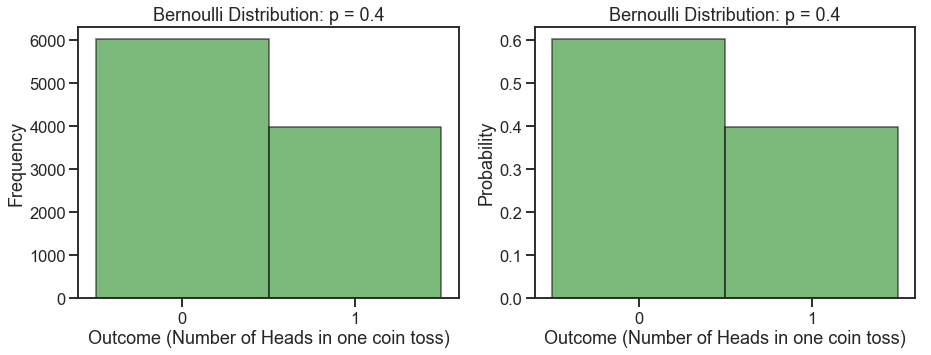

In [62]:
# generate bernoulli, n=1
data_bern = bernoulli.rvs(size=10000,p=0.4)

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = plt.hist(
    data_bern,
    bins=[0,1,2],
    density=False,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Bernoulli Distribution: p = 0.4')
plt.xlabel('Outcome (Number of Heads in one coin toss)')
plt.ylabel('Frequency')
plt.xticks([0.5, 1.5], ['0','1'])

plt.subplot(1, 2, 2)
ax = plt.hist(
    data_bern,
    bins=[0,1,2],
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Bernoulli Distribution: p = 0.4')
plt.xlabel('Outcome (Number of Heads in one coin toss)')
plt.ylabel('Probability')
plt.xticks([0.5, 1.5], ['0','1'])

plt.show()

Above we are shown the frequency of heads when our single trial experiment was repeated 10,000 times. We ended up with ~6,000 heads and ~4,000 tails; exactly what we would expect based on our probabilities! CONTINUE

It should also be apparent that the expected value of our random variable is:

$$E[X] = p$$

Intuitively, I have no doubt that this makes sense. If you know the probability of heads is 0.7, and heads is defined as success (our random variable), then the expectation of our random variable is 0.7. If this is not intuitively clear, please see my previous intro to statistics post. 

However, we can still place some mathematical rigor behind this intuitive outcome, with the following proof below. Note, there will be a slight change in notation: I am now going to represent our bernoulli random variable as $X$ and the outcome as $x$ (no longer $k$). So our probability mass function will look like:

$$P(X = x) = p^x(1-p)^{1-x}$$

Where the outcome $x$ can be either 0 or 1. We will utilize the shorthand for our pmf:

$$P(X=x) = p(x)$$

By definition, the expectation of a discrete random variable $X$ is:

$$E(X) = \sum_x xp(x)$$

In the bernoulli process, there are only two possible outcomes that can occur, $x = \{0, 1\}$:

$$E(X) = 0*p^0(1-p)^{1-0} + 1*p^1(1-p)^{1-1}$$

Above, we are just multiplying 0 times the probability that 0 occurs and adding it to 1 times the probability that 1 occurs. This results in:

$$E(X) = 0(1-p) + 1p = p$$

And there we have it, a quick proof that $E(X) = p$ in the case of a bernoulli random variable $X$. 

Now, it is incredibly important to keep in mind that the random variable in this case is _the number of heads on a single flip_. Recall, a random variable is a function, so our function is literally just the probability of flipping heads if we flip the coin one time. This will be important as we discuss the binomial distribution next. 

### 1.2 Binomial Distribution
Now that we have a good understanding of the bernoulli distribution, we can start dissecting the **binomial distribution**. The binomial distribution is very similar to the bernoulli in that it:
* Is an experiment based on independent trials
* Each trial can have only two possible outcomes

The main difference is that the number of trials, $n$, can now be greater than 1! To make this a bit more clear it helps to think about what random variable we are actually finding the distribution of in this case. We are going to be dealing with the random variable that represents the _number of successes_ in $n$ successive independent trials of a bernoulli experiment.

For example, we may now be looking for the number of heads in $n$ coin flips. This means that if $n=10$, our random variable will take on a value between 0 and 10 (the minimum and maximum number of coin flips). Mathematically the binomial distribution looks like:

$$P(k \mid n, p) = {n\choose k} p^k (1-p)^{n-k}$$

Where ${n\choose k}$ is the **binomial coefficient**:

$${n\choose k} = \frac{n!}{k!(n-k)!}$$

The binomial coefficient is used to take into account the fact that their are multiple ways to pick $k$ unordered outcomes from $n$ possibilities. This is known as a **combination** or **combinatorial number**. For instance, if we were flipping a coin twice, there are multiple ways to get a single head: We could flip heads on the first try and tails on the second, or vice versa; they each result in a single head. 

I also should note that the above is the _probability mass function_, meaning it represents the probability of getting exactly $k$ successes in $n$ trials. The _cumulative distribution function_ on the other hand is defined as:

$$F(k \mid n, p) = P(X \leq k) = \sum_{i=0}^k {n\choose i} p^i (1-p)^{n-i}$$

This summation will come back to be very important later on, so keep it in mind!

With that said, we can also write the pmf definition as follows:

$$P(X=x) = {n\choose k} p^x (1-p)^{n-x}$$

And:

$${n\choose x} = \frac{n!}{x!(n-x)!}$$

Where $x = 0,1,2,...,n$. Depending on whether you have seen the binomial distribution before you may be more comfortable with one or another of the above equations.

What that out of the way, our expected value is updated to reflect the number of flips times the probability of success:

$$E[X] = np$$

As with the bernoulli expectation, this should be rather intuitive. If we flip a coin with a probability of 0.5 for heads 100 times, we would expect to get 50 heads. However, again I find it useful to derive this for good measure. 

We must take into account that a binomial random variable can just be thought of as the sum of $n$ independent Bernoulli random variables, each with a mean $p$ and variance $p(1-p)$. If we let $U_1,...,U_n$ be independent Bernoulli random variables (for example, coin flips), where:

$$E(U_i) = p$$

Hence, our binomial random variable $X$ will be the sum of these bernoulli random variables:

$$X = U_1 + ... + U_n$$

And the expectation of our binomial random variable $X$ is the sum of the $n$ bernoulli random variables: 

$$E(X) = E(U_1 + ... + U_n)$$

We can use the properties of the expectation to show that this is just the sum of the expecations:

$$E(X) = E(U_1) + ... + E(U_n)$$

Remember, each bernoulli random variable $U_i$ has an expectation of $p$! So we are simply adding up $p$ $n$ times:

$$E(X) = \sum_i^n = p_i = np$$

A concrete example will make this more clear. Imagine that our random variable is _the function/process of flipping a coin twice and getting a certain number of heads_. Keep in mind, prior to this our random variable was representing flipping the coin a single time and getting heads. So now we are flipping the coin twice. We want to model the distribution of heads in the outcomes. Our potential outcomes would look like:

|Outcomes|Flip 1|Flip 2|Number of heads (the random variable)|
|--------|------|------|---------------|
|1|Heads|Heads|2|
|2|Heads|Tails|1|
|3|Tails|Heads|1|
|4|Tails|Tails|0|

Again, it is incredibly important to keep in mind that the number of heads is the random variable! In other words, we are modeling a random variable, which we refer to as $X$, that has taken on the values $\{2,1,1,0\}$. We can then look at the frequency of each value of $X$:

|Value of X (number of heads in 2 flips)|Frequency during 4 trials|
|---|---|
|2|1|
|1|2|
|0|1|

This table above is where our distribution is going to come from! Below, I run 10,000 simulations of this process and we end up with exactly what we would have expected! There are 4 possible outcomes as we saw in the table, and the probability zero heads and two heads is 25% (for each), and the probability of flipping one head is 50%. If we divide the frequency (left plot) of observations by the total number of observations, we can normalize this to a standard probability distribution (right plot):

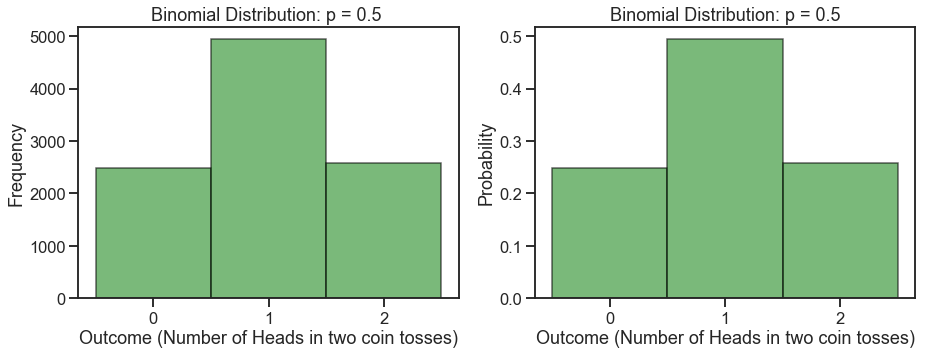

In [61]:
# generate binomial, n=2 
data_binom = binom.rvs(n=2,p=0.5,size=10000)

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = plt.hist(
    data_binom,
    bins=[0,1,2,3],
    density=False,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5 ')
plt.xlabel('Outcome (Number of Heads in two coin tosses)')
plt.ylabel('Frequency')
plt.xticks([0.5, 1.5 , 2.5], ['0','1','2'])

plt.subplot(1, 2, 2)
ax = plt.hist(
    data_binom,
    bins=[0,1,2,3],
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in two coin tosses)')
plt.ylabel('Probability')
plt.xticks([0.5, 1.5 , 2.5], ['0','1','2'])

plt.show()

And we can see how the distribution changes as we change the probability of success:

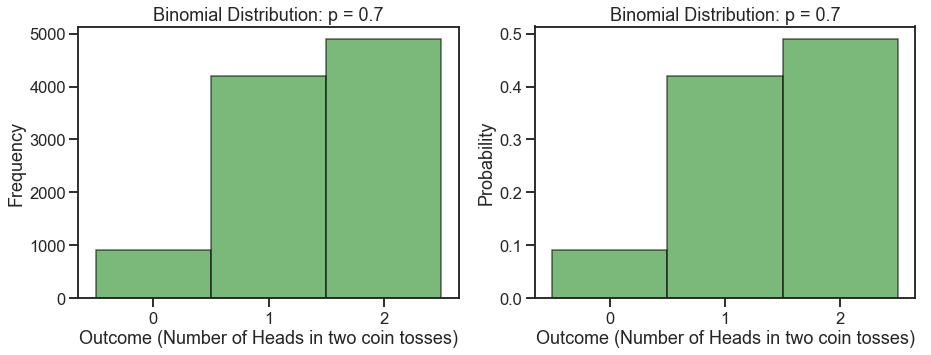

In [60]:
# generate binomial, n=2 
data_binom = binom.rvs(n=2,p=0.7,size=10000)

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = plt.hist(
    data_binom,
    bins=[0,1,2,3],
    density=False,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.7')
plt.xlabel('Outcome (Number of Heads in two coin tosses)')
plt.ylabel('Frequency')
plt.xticks([0.5, 1.5 , 2.5], ['0','1','2'])

plt.subplot(1, 2, 2)
ax = plt.hist(
    data_binom,
    bins=[0,1,2,3],
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.7')
plt.xlabel('Outcome (Number of Heads in two coin tosses)')
plt.ylabel('Probability')
plt.xticks([0.5, 1.5 , 2.5], ['0','1','2'])

plt.show()

What is more interesting do, however, is to change the _number of trials_. So far we have looked at the bernoulli distribution where $n=1$ and then a simple case of the binomial where $n=2$. What about the case where $n=5$?  

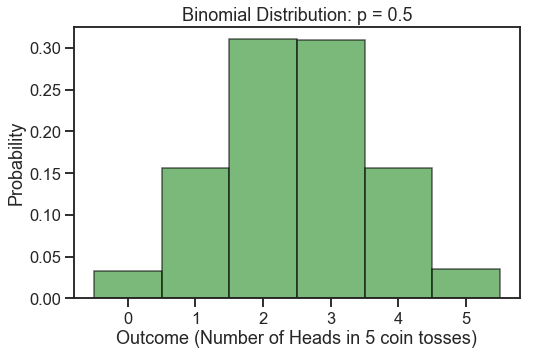

In [59]:
# generate binomial, n=5 
n = 5
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]


fig = plt.figure(figsize=(8,5))

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 5 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1)]
xtick_val = [i for i in range(n+1)]
plt.xticks(xtick_loc, xtick_val)

plt.show()

It is interesting to take note of the shape that is starting to emerge. Let's look at the case where $n=10$:

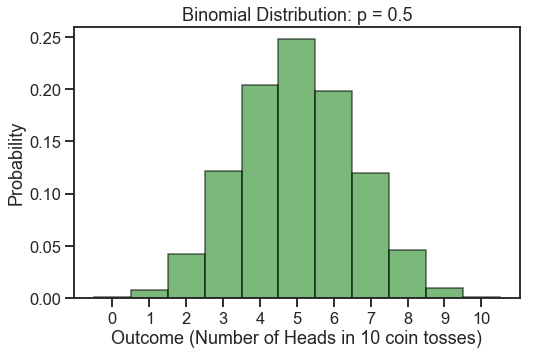

In [58]:
# generate binomial, n=10
n = 10
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]


fig = plt.figure(figsize=(8,5))

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 10 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1)]
xtick_val = [i for i in range(n+1)]
plt.xticks(xtick_loc, xtick_val)

plt.show()

This should be starting to look more and more familiar to the normal distribution that we looked at earlier and that you have surely seen in the past. Let's check $n=25$ and $n=50$:

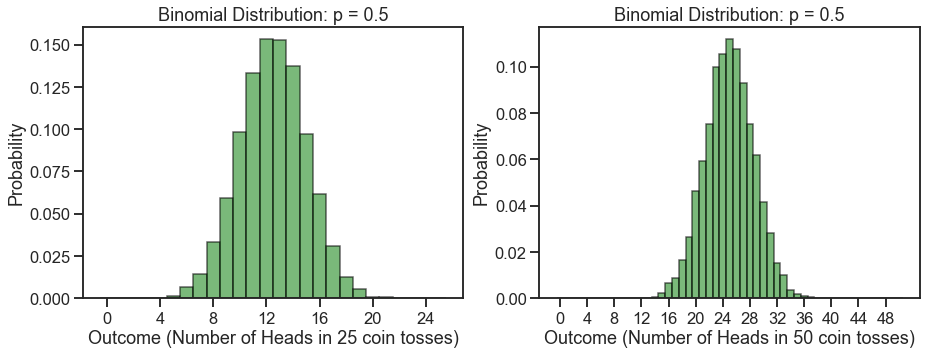

In [64]:
# generate binomial, n=25
fig = plt.figure(figsize=(15,5))
n = 25
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

plt.subplot(1, 2, 1)

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 25 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)

# generate binomial, n=50
n = 50
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

plt.subplot(1, 2, 2)

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 50 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)

plt.show()

### 1.3 Approximating the Binomial Distribution
This is beginning to look very close to the normal distribution! We can even overlay the theoretical normal distribution on top of each of these plots to show what a great approximation to the binomial distribution the normal is:

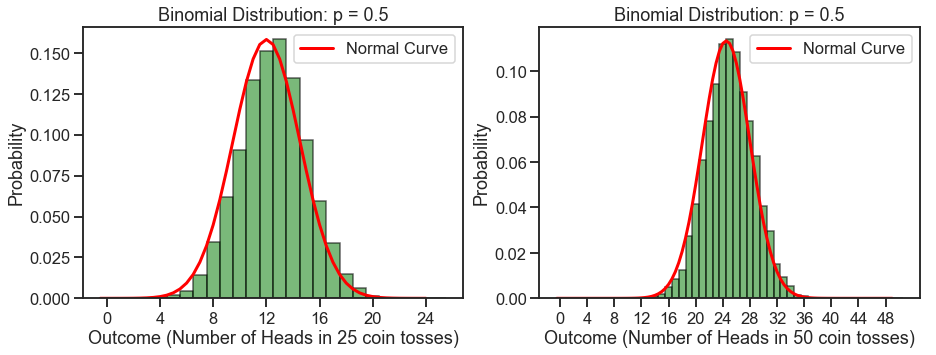

In [63]:
# generate binomial, n=25
fig = plt.figure(figsize=(15,5))
n = 25
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

plt.subplot(1, 2, 1)

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 25 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)
x = np.arange(0, 25, 0.5)
p = norm.pdf(x, 12.5, data_binom.std())
plt.plot(x, p, 'k', linewidth=3, c='r')
plt.legend(['Normal Curve'])

# generate binomial, n=50
n = 50
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

plt.subplot(1, 2, 2)

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 50 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)
x = np.arange(0, 50, 0.5)
p = norm.pdf(x, 25, data_binom.std())
plt.plot(x, p, 'k', linewidth=3, c='r')
plt.legend(['Normal Curve'])

plt.show()

Now, this is a big idea! Simply put:

> The normal distrubtion came about as a way to utilize a continuous distribution to approximate the discrete binomial distribution.

The binomial distrubtion suffered from many computational challenges, something very common when dealing with summations of the type seen in the cumulative distribution function shown earlier: 

$$F(k \mid n, p) = P(X \leq k) = \sum_{i=0}^k {n\choose i} p^i (1-p)^{n-i}$$

These computational challenges meant that mathematicians began searching for **approximations**. In a sense, we can view that situation as follows: mathematicians _had access to the green discrete distribution above_ and they wanted to find the red function that could be used to approximate it. Now before we dig into how exactly they did that, we need to take a quick aside to talk about function transformations.

## 2. Function Transformations

In [39]:
x = np.arange(-5, 5, 0.1)
mu = 0
sigma = 1 

y = (1/(np.sqrt(2 * np.pi)*sigma))*np.exp(-0.5*((x - mu)/sigma)**2)

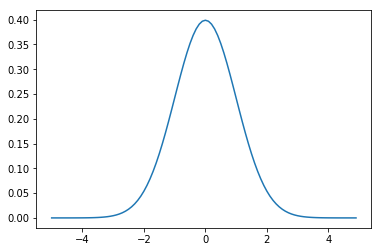

In [58]:
plt.plot(x, y)

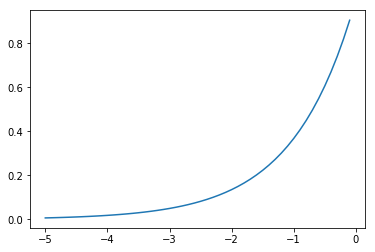

In [67]:
# Regular exponential plot
plt.plot(x[:50], np.exp(x[:50]))

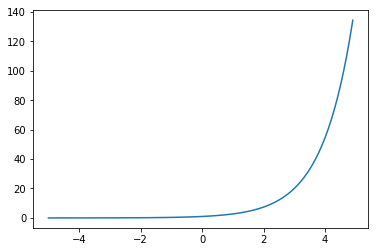

In [68]:
plt.plot(x, np.exp(x))

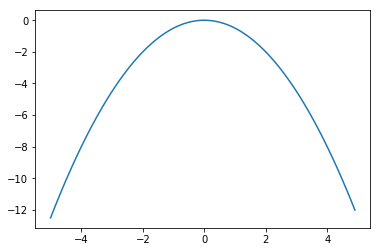

In [69]:
# Plot of what is passed into the exponential func
y_inner = -0.5*x**2
plt.plot(x, y_inner)


In [75]:
np.exp(0)

1.0

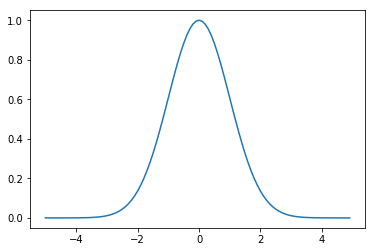

In [61]:
y2 = np.exp(y_inner)
plt.plot(x, y2)

In [63]:
np.exp(-2)

0.1353352832366127

In [82]:
# Next steps
# Focus on the process of original x being passed through inner (which is composed 
# of square and then negation) and then exponential
# This composition is what results in bell curve. Missing any step would be a mistake.
# This revelation is very common in ML as well (think sigmoid)

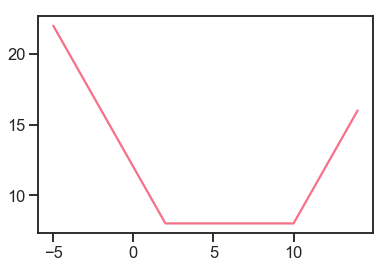

In [83]:
x = np.arange(-5,15)
g = np.abs(x - 2) + np.abs(x - 10)
plt.plot(x, g)

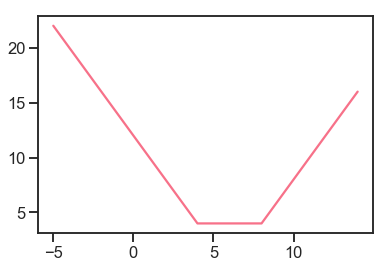

In [84]:
# Note the flat minimum above
x = np.arange(-5,15)
g2 = np.abs(x - 4) + np.abs(x - 8)
plt.plot(x, g2)

In [87]:
# Create visualization to go along with median proof (via induction) from page 100 
# goal is to converge to median
# Will also want to do a bill gates example in order to show where theoretical mean is
# and prove that by this method the convergence is to the median, not mean.
# Can also plot function f(x) below (it will not be animated) and have it be clear that where its minimum 
# is (the median) our animation (based on induction) also converges to!

$$f(x) = \sum_{i=1}^n \mid x - x_i\mid$$